# 3. Simulate a dataset for Classification with 3 Labels, 6 attributes with interaction among them, 10000 instances and use Uniform random function

In [14]:
import pandas as pd
import numpy as np

n_labels = 3
n_attributes = 6
n_instances = 10000

data = np.random.uniform(low=0, high=1, size=(n_instances, n_attributes))
data[:, 1] = data[:, 0] ** 2
data[:, 2] = np.sin(data[:, 0] + data[:, 1])
data[:, 3] = data[:, 4] * 2
data[:, 5] = data[:, 0] * data[:, 4]

labels = np.random.randint(low=0, high=n_labels, size=n_instances)

df0 = pd.DataFrame(data, columns=[f'Attribute_{i+1}' for i in range(n_attributes)])
df0['Label'] = labels

print(df0.head())


   Attribute_1  Attribute_2  Attribute_3  Attribute_4  Attribute_5  \
0     0.704109     0.495770     0.931995     0.323938     0.161969   
1     0.436438     0.190478     0.586650     0.272517     0.136258   
2     0.242453     0.058784     0.296701     1.009212     0.504606   
3     0.411918     0.169676     0.549357     1.480828     0.740414   
4     0.860191     0.739928     0.999570     1.465730     0.732865   

   Attribute_6  Label  
0     0.114044      2  
1     0.059468      1  
2     0.122343      0  
3     0.304990      1  
4     0.630404      0  


#4. Simulate a dataset for regression 6 attributes with interaction among them, 10000 instances and use normal random function

In [8]:
import pandas as pd
import numpy as np

n_attributes = 6
n_instances = 10000

data1 = np.random.normal(loc=0, scale=1, size=(n_instances, n_attributes))
data1[:, 1] = data1[:, 0] ** 2
data1[:, 2] = np.sin(data1[:, 0] + data1[:, 1])
data1[:, 3] = data1[:, 4] * 2
data1[:, 5] = data1[:, 0] * data1[:, 4]

target = (
    3 * data1[:, 0]
    + 2 * data1[:, 1]
    + np.sin(data1[:, 2])
    - 1.5 * data1[:, 3]
    + 0.5 * data1[:, 4]
    + np.random.normal(loc=0, scale=0.5, size=n_instances)
)

df1 = pd.DataFrame(data1, columns=[f'Attribute_{i+1}' for i in range(n_attributes)])
df1['Target'] = target


print(df1.head())


   Attribute_1  Attribute_2  Attribute_3  Attribute_4  Attribute_5  \
0     1.046258     1.094656     0.841838    -0.030806    -0.015403   
1    -1.255342     1.575883     0.315080    -4.340477    -2.170238   
2     0.633565     0.401405     0.859847    -1.401870    -0.700935   
3     0.948902     0.900415     0.961463     0.075837     0.037918   
4     0.065687     0.004315     0.069945     2.950495     1.475247   

   Attribute_6    Target  
0    -0.016115  6.189690  
1     2.724391  4.823607  
2    -0.444088  5.266478  
3     0.035981  5.553803  
4     0.096905 -3.606605  


# 5. Simulate a dataset for Clustering 6 attributes with interaction among them, 10000 instances and use normal random function.

In [4]:
import pandas as pd
import numpy as np

n_attributes = 6
n_instances = 10000
n_clusters=4

data = np.random.normal(loc=0, scale=1, size=(n_instances, n_attributes))
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E', 'F'])
df.to_csv('data.csv', index=False)

df['Cluster'] = np.random.randint(low=0, high=n_clusters, size=n_instances)

print(df.head())
print(df['Cluster'].value_counts())

          A         B         C         D         E         F  Cluster
0  0.088911 -0.235289  0.753307  0.070676  1.393606 -0.976788        1
1  0.520648  0.673404  1.039333  2.446090 -0.099331  0.099943        1
2  0.455012 -1.573334  1.122312  0.296777 -0.851180 -0.441373        1
3  0.861008  1.734746 -0.371880 -0.009156 -1.994481 -0.286910        1
4  0.393858 -0.820107 -1.553838  0.491685 -2.062648  1.089892        2
Cluster
0    2572
1    2519
2    2514
3    2395
Name: count, dtype: int64


#6. Build a Non Linear Regression model and get 90% Accuracy for the above simulated data in question2. Split the data into 70% and 30% respectively for Training and Testing for model building

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x=df1.iloc[:,:6]
y=df1['Target']

poly=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=0) #70% 30%

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy=r2_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9901883341441969


# 7. Build any five Classifiers for the above dataset in question1 and compare the metrics of these built models. Metrics need to build are Accuracy, Precision, Recall, F1Score. Split the data into 70% and 30% respectively for Training and Testing for model building

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

x = df0.iloc[:, :6]
y = df0['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=0),
    "Support Vector Classifier": SVC(kernel='linear', random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = []


for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on the test set


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.328667   0.326213  0.328667  0.322135
1  Support Vector Classifier  0.332667   0.332358  0.332667  0.315069
2              Decision Tree  0.341333   0.342071  0.341333  0.340739
3              Random Forest  0.333667   0.333903  0.333667  0.333306
4        K-Nearest Neighbors  0.344000   0.343010  0.344000  0.334132


# 8. Load CSV, EXCEL, EXCELS, JSON format datasets from local host and Websites into Colab interface and split them into Train and test data.

In [182]:
from sklearn.model_selection import train_test_split
import pandas as pd

data=pd.read_csv('/content/P7_DLSR.csv')
x=data.iloc[:,1:]
y=data.iloc[:,0]

# training=70% testing=30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

print("Train Data:")
print(x_train.shape)
print("\nTest Data:")
print(x_test.shape)


Train Data:
(377, 5)

Test Data:
(162, 5)


# 9. Load different datasets from SkLearn library into Colab  interface and split them into train and test data. Apply Normalization techniques to convert input data into standardize.  

**1. iris dataset**

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the dataset
data = load_iris()
x = data.data
y = data.target

# Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the data : mean=0, std=1
s = StandardScaler()
x_train_standard = s.fit_transform(x_train)
x_test_standard = s.transform(x_test)

# Normalize the data : scaled to [0, 1] or [-1, 1]
m = MinMaxScaler()
x_train_minmax = m.fit_transform(x_train)
x_test_minmax = m.transform(x_test)


print("Train Data (Standardized):", x_train_standard.shape)
print("Test Data (Standardized):", x_test_standard.shape)
print("Train Data (Normalized):", x_train_minmax.shape)
print("Test Data (Normalized):", x_test_minmax.shape)

# few rows of standardized data
print("\nFirst 5 rows of Standardized Train Data:")
print(pd.DataFrame(x_train_standard).head())

# few rows of normalized data
print("\nFirst 5 rows of Normalized Train Data:")
print(pd.DataFrame(x_train_minmax).head())

df=pd.DataFrame(x_train)
df.head()

Train Data (Standardized): (105, 4)
Test Data (Standardized): (45, 4)
Train Data (Normalized): (105, 4)
Test Data (Normalized): (45, 4)

First 5 rows of Standardized Train Data:
          0         1         2         3
0 -0.413416 -1.462003 -0.099511 -0.323398
1  0.551222 -0.502563  0.717703  0.353032
2  0.671802  0.217016  0.951192  0.758890
3  0.912961 -0.022844  0.309096  0.217746
4  1.636440  1.416315  1.301427  1.705891

First 5 rows of Normalized Train Data:
          0         1         2         3
0  0.352941  0.181818  0.464286  0.375000
1  0.588235  0.363636  0.714286  0.583333
2  0.617647  0.500000  0.785714  0.708333
3  0.676471  0.454545  0.589286  0.541667
4  0.852941  0.727273  0.892857  1.000000


,0,1,2,3
0,5.5,2.4,3.7,1.0
1,6.3,2.8,5.1,1.5
2,6.4,3.1,5.5,1.8
3,6.6,3.0,4.4,1.4
4,7.2,3.6,6.1,2.5


**2. Breast Cancer Dataset**

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the dataset
data = load_breast_cancer()
x = data.data
y = data.target

# Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the data : mean=0, std=1
s = StandardScaler()
x_train_standard = s.fit_transform(x_train)
x_test_standard = s.transform(x_test)

# Normalize the data : scaled to [0, 1] or [-1, 1]
m = MinMaxScaler()
x_train_minmax = m.fit_transform(x_train)
x_test_minmax = m.transform(x_test)


print("Train Data (Standardized):", x_train_standard.shape)
print("Test Data (Standardized):", x_test_standard.shape)
print("Train Data (Normalized):", x_train_minmax.shape)
print("Test Data (Normalized):", x_test_minmax.shape)

# few rows of standardized data
print("\nFirst 5 rows of Standardized Train Data:")
print(pd.DataFrame(x_train_standard).head())

# few rows of normalized data
print("\nFirst 5 rows of Normalized Train Data:")
print(pd.DataFrame(x_train_minmax).head())

df=pd.DataFrame(x_train)
df.head()

Train Data (Standardized): (398, 30)
Test Data (Standardized): (171, 30)
Train Data (Normalized): (398, 30)
Test Data (Normalized): (171, 30)

First 5 rows of Standardized Train Data:
         0         1         2         3         4         5         6   \
0 -0.123490 -0.296801 -0.170507 -0.208616 -1.201680 -0.773170 -0.762312   
1 -0.228268 -0.657951 -0.253775 -0.296503 -1.804637 -0.587616 -0.091985   
2  0.145534 -1.230564  0.245833 -0.010242  0.519184  1.570006  0.732320   
3 -0.358532 -0.672207 -0.400937 -0.400014 -1.203862 -0.970650 -0.634704   
4 -0.157472  0.967224 -0.208843 -0.241538 -0.254695 -0.700630 -0.750349   

         7         8         9   ...        20        21        22        23  \
0 -0.933241 -1.229949 -0.948166  ... -0.197620 -0.506748 -0.307910 -0.273576   
1 -0.542684 -1.419985 -0.612491  ... -0.422917 -0.458495 -0.465287 -0.438127   
2  0.386583  1.054201  1.574228  ...  0.036022 -1.192272  0.203869 -0.127445   
3 -0.654992  0.096572 -0.827986  ... -0.50218

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
1,13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.26,22.75,91.99,632.1,0.10250,0.2531,0.3308,0.08978,0.2048,0.07628
2,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.3635,0.3219,0.11080,0.2827,0.09208
3,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.10970,0.1506,0.1764,0.08235,0.3024,0.06949
4,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.12160,0.1517,0.1049,0.07174,0.2642,0.06953


**3. California Housing Dataset**

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the dataset
data = fetch_california_housing()
x = data.data
y = data.target

# Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the data : mean=0, std=1
s = StandardScaler()
x_train_standard = s.fit_transform(x_train)
x_test_standard = s.transform(x_test)

# Normalize the data : scaled to [0, 1] or [-1, 1]
m = MinMaxScaler()
x_train_minmax = m.fit_transform(x_train)
x_test_minmax = m.transform(x_test)


print("Train Data (Standardized):", x_train_standard.shape)
print("Test Data (Standardized):", x_test_standard.shape)
print("Train Data (Normalized):", x_train_minmax.shape)
print("Test Data (Normalized):", x_test_minmax.shape)

# few rows of standardized data
print("\nFirst 5 rows of Standardized Train Data:")
print(pd.DataFrame(x_train_standard).head())

# few rows of normalized data
print("\nFirst 5 rows of Normalized Train Data:")
print(pd.DataFrame(x_train_minmax).head())

df=pd.DataFrame(x_train)
df.head()

Train Data (Standardized): (14448, 8)
Test Data (Standardized): (6192, 8)
Train Data (Normalized): (14448, 8)
Test Data (Normalized): (6192, 8)

First 5 rows of Standardized Train Data:
          0         1         2         3         4         5         6  \
0  0.133506  0.509357  0.181060 -0.273850 -0.184117 -0.010825 -0.805682   
1 -0.532218 -0.679873 -0.422630 -0.047868 -0.376191 -0.089316 -1.339473   
2  0.170990 -0.362745  0.073128 -0.242600 -0.611240 -0.044800 -0.496645   
3 -0.402916 -1.155565  0.175848 -0.008560 -0.987495 -0.075230  1.690024   
4 -0.299285  1.857152 -0.259598 -0.070993  0.086015 -0.066357  0.992350   

          7  
0  0.780934  
1  1.245270  
2 -0.277552  
3 -0.706938  
4 -1.430902  

First 5 rows of Normalized Train Data:
          0         1         2         3         4         5         6  \
0  0.250431  0.666667  0.035410  0.025379  0.034054  0.001845  0.146809   
1  0.162977  0.372549  0.024907  0.029375  0.027916  0.001064  0.025532   
2  0.255355  0

,0,1,2,3,4,5,6,7
0,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
1,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
2,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
3,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
4,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


#  10. Load any data from website/Local host and apply the below data wrangling techniques


In [39]:
import pandas as pd
titanic=pd.read_csv('/content/Titanic.csv')
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**a) split**

In [40]:
x=titanic.iloc[:445]
y=titanic.iloc[445:]
x,y

(     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0              1         0       3  ...   7.2500   NaN         S
 1              2         1       1  ...  71.2833   C85         C
 2              3         1       3  ...   7.9250   NaN         S
 3              4         1       1  ...  53.1000  C123         S
 4              5         0       3  ...   8.0500   NaN         S
 ..           ...       ...     ...  ...      ...   ...       ...
 440          441         1       2  ...  26.2500   NaN         S
 441          442         0       3  ...   9.5000   NaN         S
 442          443         0       3  ...   7.7750   NaN         S
 443          444         1       2  ...  13.0000   NaN         S
 444          445         1       3  ...   8.1125   NaN         S
 
 [445 rows x 12 columns],
      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 445          446         1       1  ...  81.8583   A34         S
 446          447         1       2  ...  19.500

**b)merge**

In [41]:
merge_df=pd.concat([x,y],axis=0)
merge_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**c) Select rows by condition**

In [42]:
rows_above_age_30 = titanic[titanic['Age'] > 30]
rows_above_age_30

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


**d) Select Columns by condition**

In [43]:
columns=titanic[['PassengerId','Survived','Pclass','Name']]
columns

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas"
887,888,1,1,"Graham, Miss. Margaret Edith"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell"


**e)Rename columns**

In [45]:
renamed_columns=titanic.rename(columns={'PassengerId':'PId','Pclass':'PassengerClass'})
renamed_columns

,PId,Survived,PassengerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**f) Min, max, avg, varience**

In [46]:
minimum_fare=titanic['Fare'].min()
maximum_fare=titanic['Fare'].max()
average_fare=titanic['Fare'].mean()
variance_fare=titanic['Fare'].var()
print("minimum fare:",minimum_fare)
print("maximum fare:",maximum_fare)
print("average fare:",average_fare)
print("variance fare:",variance_fare)

minimum fare: 0.0
maximum fare: 512.3292
average fare: 32.204207968574636
variance fare: 2469.436845743117


**g) describe**

In [47]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**h) size**

In [48]:
titanic.size

10692

**I) shape**

In [49]:
titanic.shape

(891, 12)

**j) find unique values**

In [50]:
unique_values=titanic['Name'].unique()
unique_values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

**k)find missing values and fill them with average value/ mode value**

In [52]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
print(titanic.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


<ipython-input-52-c6a38f2c1f3d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
<ipython-input-52-c6a38f2c1f3d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

**l) replace attribute value name with other name**

In [56]:
titanic['Sex'] = titanic['Sex'].replace({'male': 'M', 'female': 'F'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


**m)delete columns**

In [57]:
titanic.drop('Cabin', axis=1, inplace=True) #Cabin column deleted
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,S


**n) delete some rows**

In [59]:
titanic.drop(titanic.index[:5], inplace=True) #deleted first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",F,4.0,1,1,PP 9549,16.7000,S


**o) join datasets(left,right)**

In [60]:
left = titanic.iloc[:200]  # First 200 rows as left dataset
right = titanic.iloc[200:400] # Rows 201 to 400 as the right dataset
merged_df = pd.merge(left, right, on='PassengerId', how='left', suffixes=('_left', '_right'))
print(merged_df.head())

   PassengerId  Survived_left  Pclass_left  ... Ticket_right Fare_right  Embarked_right
0            7              0            1  ...          NaN        NaN             NaN
1            8              0            3  ...          NaN        NaN             NaN
2            9              1            3  ...          NaN        NaN             NaN
3           10              1            2  ...          NaN        NaN             NaN
4           11              1            3  ...          NaN        NaN             NaN

[5 rows x 21 columns]


In [63]:
dummy_data = pd.DataFrame({'PassengerId': [1, 2, 3], 'VIP_Status': ['Yes', 'No', 'No']})
left_joined_df = pd.merge(titanic, dummy_data, on='PassengerId', how='left')
left_joined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,VIP_Status
0,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,S,NaN
1,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,S,NaN
2,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,S,NaN
3,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,C,NaN
4,11,1,3,"Sandstrom, Miss. Marguerite Rut",F,4.0,1,1,PP 9549,16.7000,S,NaN


p) groups values by rows

In [66]:
grouped_by_embarked = titanic.groupby('Embarked')['Fare'].mean()
grouped_by_embarked

,Fare
Embarked,
C,59.886305
Q,13.339421
S,27.294507


**q) loop over columns**

In [69]:
loop_over_cols={col: titanic[col].head().to_list() for col in titanic.columns} #to display first 5 values
loop_over_cols

{'PassengerId': [7, 8, 9, 10, 11],
 'Survived': [0, 0, 1, 1, 1],
 'Pclass': [1, 3, 3, 2, 3],
 'Name': ['McCarthy, Mr. Timothy J',
  'Palsson, Master. Gosta Leonard',
  'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
  'Nasser, Mrs. Nicholas (Adele Achem)',
  'Sandstrom, Miss. Marguerite Rut'],
 'Sex': ['M', 'M', 'F', 'F', 'F'],
 'Age': [54.0, 2.0, 27.0, 14.0, 4.0],
 'SibSp': [0, 3, 0, 1, 1],
 'Parch': [0, 1, 2, 0, 1],
 'Ticket': ['17463', '349909', '347742', '237736', 'PP 9549'],
 'Fare': [51.8625, 21.075, 11.1333, 30.0708, 16.7],
 'Embarked': ['S', 'S', 'S', 'C', 'S']}

**r) group rows by time**

In [71]:
group_rows=titanic.groupby('Pclass')['Age'].mean()
group_rows


,Age
Pclass,
1,37.053241
2,29.866958
3,26.388708


**s)concatenating datasets**

In [74]:
concat_datasets=pd.concat([titanic,titanic],axis=0)
concat_datasets

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.000000,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",F,4.000000,1,1,PP 9549,16.7000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,30.0000,C


**t) append rows**

In [83]:
new_row = {
    'PassengerId': 892, 'Survived': 1, 'Pclass': 1, 'Name': 'Test Passenger', 'Sex': 'M',
    'Age': 30, 'SibSp': 0, 'Parch': 0, 'Ticket': '12345', 'Fare': 50, 'Embarked': 'S'
}
appended_df= pd.concat([titanic, pd.DataFrame([new_row])], ignore_index=True)
appended_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,888,1,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,30.00,S
882,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,29.699118,1,2,W./C. 6607,23.45,S
883,890,1,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,30.00,C
884,891,0,3,"Dooley, Mr. Patrick",M,32.000000,0,0,370376,7.75,Q
885,892,1,1,Test Passenger,M,30.000000,0,0,12345,50.00,S


**u)append columns**

In [86]:
titanic['New_Column'] = range(len(titanic))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Column
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,C,3
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",F,4.0,1,1,PP 9549,16.7000,S,4


**w)reorder columns using pandas lib**

In [90]:
reorder_cols=titanic[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked','New_Column']]
reorder_cols

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,New_Column
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.000000,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.000000,3,1,349909,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.000000,0,2,347742,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.000000,1,0,237736,30.0708,C,3
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",F,4.000000,1,1,PP 9549,16.7000,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.000000,0,0,211536,13.0000,S,880
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,30.0000,S,881
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,29.699118,1,2,W./C. 6607,23.4500,S,882
889,890,1,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,30.0000,C,883


# 11. Load the Images and audio files. Covert audio file into spectrogram. Apply it for a length of one minute telugu song. Convert a colour image into gray scale image.

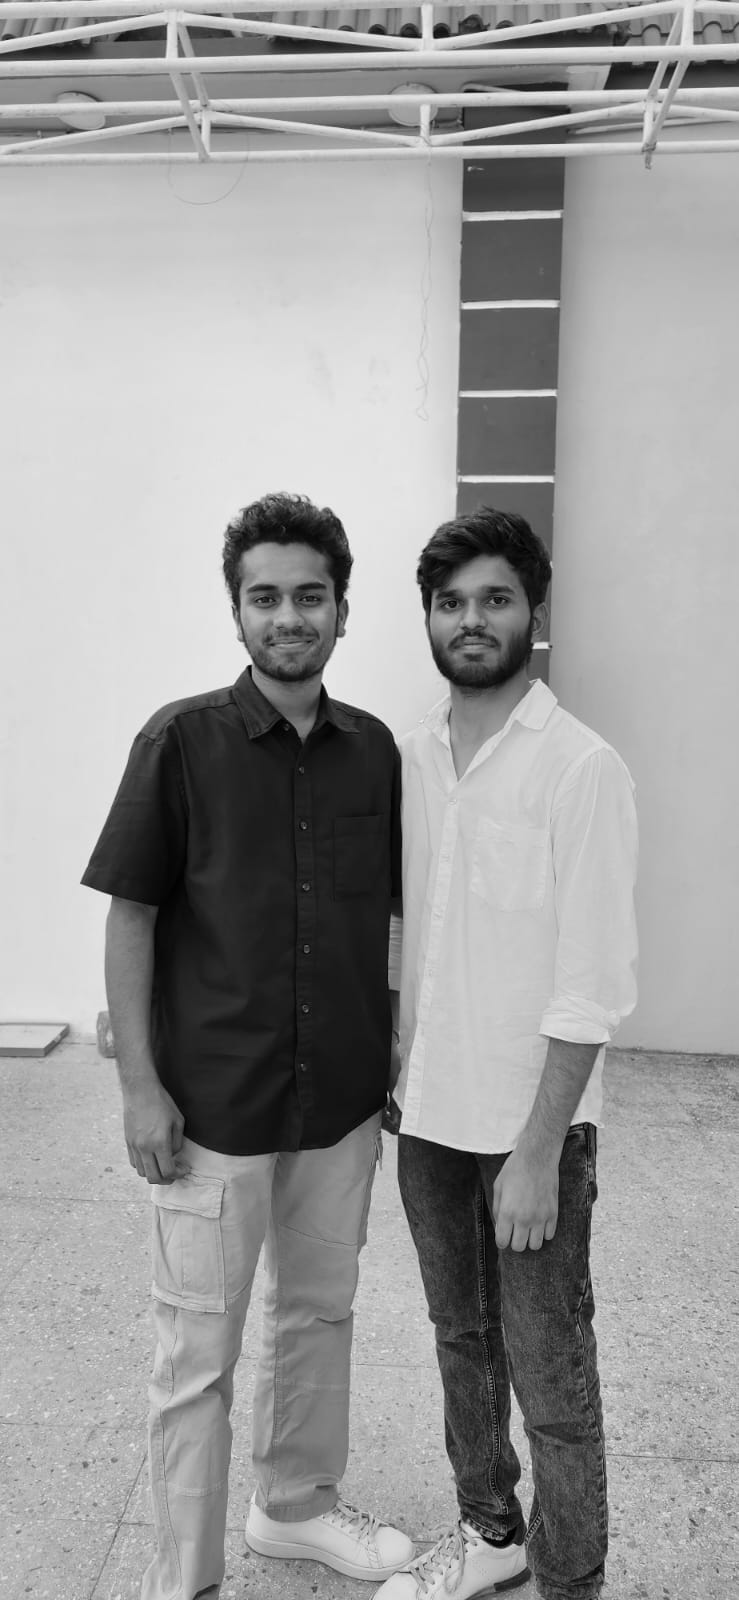

In [102]:
#Load image and gray scale conversion
import numpy as np
from PIL import Image
img=Image.open('/content/IMG-20240731-WA0007.jpg')
gray_img=img.convert('L')
gray_img

<ipython-input-110-095a93e15868>:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


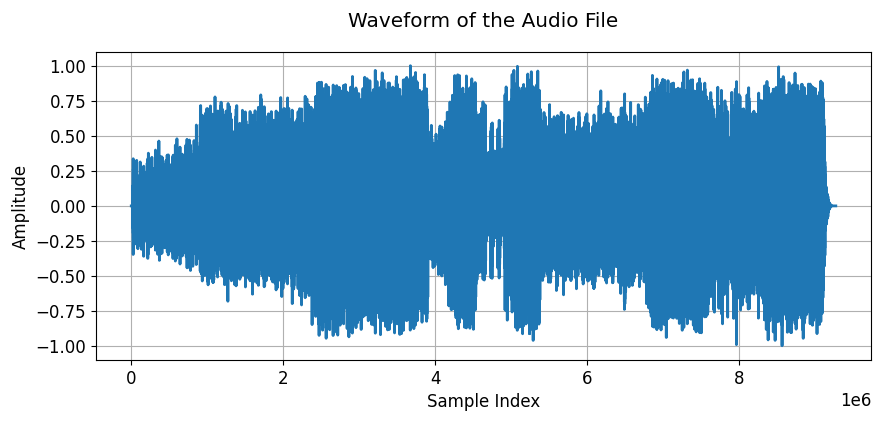

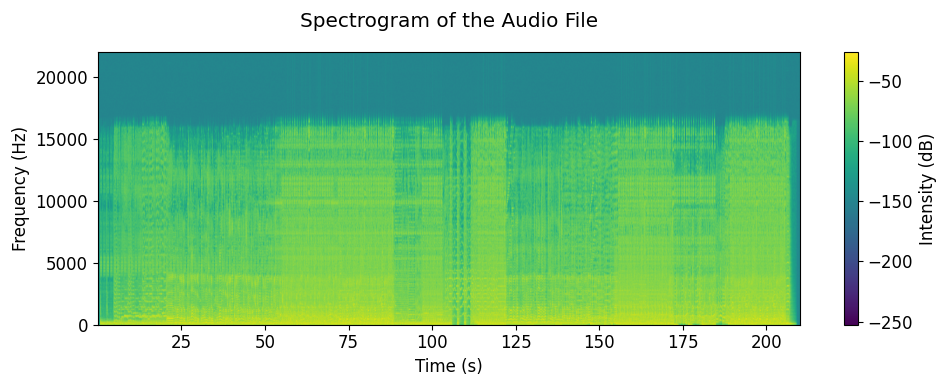

In [110]:
#audio file
from scipy.io import wavfile
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from IPython.display import set_matplotlib_formats

audio_file_path = '/content/Luckkanna Mate Nillu - SenSongsMp3.Co.wav'
rate, snd = wavfile.read(audio_file_path)

if len(snd.shape) > 1:
    snd = snd.mean(axis=1)

# Normalize the audio data [-1,1]
snd = snd / np.max(np.abs(snd))
Audio(snd, rate=rate)

rcParams['font.size'] = 12
rcParams['lines.linewidth'] = 2
rcParams['figure.figsize'] = (6, 6)
rcParams['axes.titlepad'] = 18
set_matplotlib_formats('png', 'pdf')

plt.figure(figsize=(10, 4))
plt.plot(snd)
plt.title('Waveform of the Audio File')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
spec, freqs, bins, im = plt.specgram(snd, NFFT=1024, Fs=rate, cmap='viridis', noverlap=512)
plt.colorbar(label='Intensity (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Audio File')
plt.tight_layout()
plt.show()


# 12. Load any numeric data and apply Ridge and Lasso regressions to get 90% accuracy

In [127]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.metrics import  r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris=load_iris()
features=iris.data
target=iris.data[:,2]

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=0)

ridge=Ridge(alpha=0.5) #ridge
ridge.fit(x_train,y_train)

lasso=Lasso(alpha=0.5)#lasso
lasso.fit(features,target)

y_pred_ridge=ridge.predict(x_test)
y_pred_lasso=lasso.predict(x_test)

r2_ridge=r2_score(y_test,y_pred_ridge)
r2_lasso=r2_score(y_test,y_pred_lasso)

print("Ridge Regression:")
print(f"R-squared: {r2_ridge}")

print("\nLasso Regression:")
print(f"R-squared: {r2_lasso}")


Ridge Regression:
R-squared: 0.9998927183968894

Lasso Regression:
R-squared: 0.9736528633216518


# 13. Load Digits dataset and apply clustering models to get its metrics

In [146]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


digits = load_digits()
x = digits.data
y = digits.target

s=StandardScaler()
x_standardized=s.fit_transform(x)

kmeans = KMeans(n_clusters=10,random_state=0)
kmeans.fit(x_standardized)
kmeans_score=silhouette_score(x_standardized, kmeans.labels_)

agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative.fit(x_standardized)
agg_score=silhouette_score(x_standardized, agglomerative.labels_)

print("Kmeans silhouette score:",kmeans_score)
print("Agglomerative silhouette score:",agg_score)

Kmeans silhouette score: 0.14553863671685197
Agglomerative silhouette score: 0.12532527779196986


# 14. Implement the techniques to handle imbalanced dataset to balanced dataset with binary class data

In [19]:
import warnings
warnings.filterwarnings('ignore')


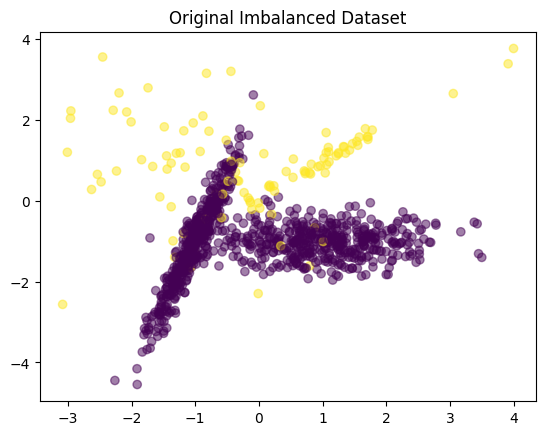

After SMOTE Oversampling:
Class Distribution: [626 626]
After Undersampling:
Class Distribution: [74 74]
After SMOTEENN Combination:
Class Distribution: [509 544]

Original Imbalanced Dataset
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       268
           1       0.93      0.78      0.85        32

    accuracy                           0.97       300
   macro avg       0.95      0.89      0.92       300
weighted avg       0.97      0.97      0.97       300



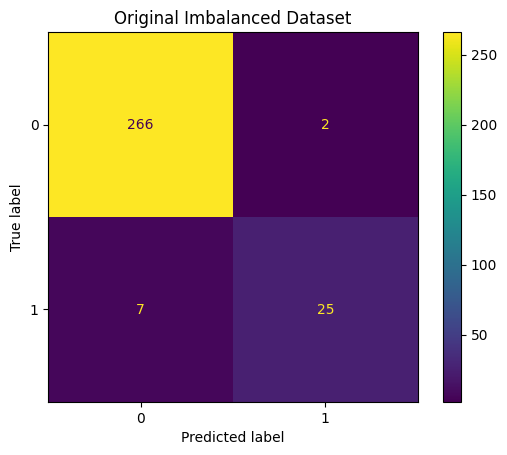


SMOTE Balanced Dataset
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       268
           1       0.74      0.81      0.78        32

    accuracy                           0.95       300
   macro avg       0.86      0.89      0.87       300
weighted avg       0.95      0.95      0.95       300



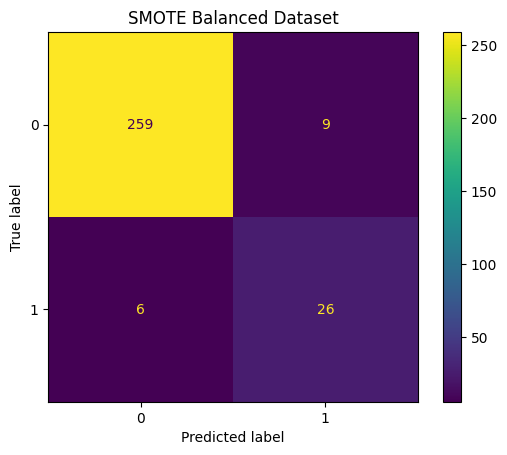


Undersampled Dataset
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       268
           1       0.59      0.84      0.69        32

    accuracy                           0.92       300
   macro avg       0.78      0.89      0.82       300
weighted avg       0.94      0.92      0.93       300



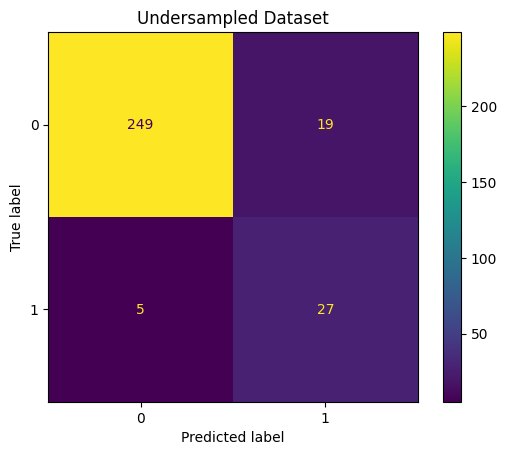


SMOTEENN Balanced Dataset
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       268
           1       0.73      0.84      0.78        32

    accuracy                           0.95       300
   macro avg       0.86      0.90      0.88       300
weighted avg       0.95      0.95      0.95       300



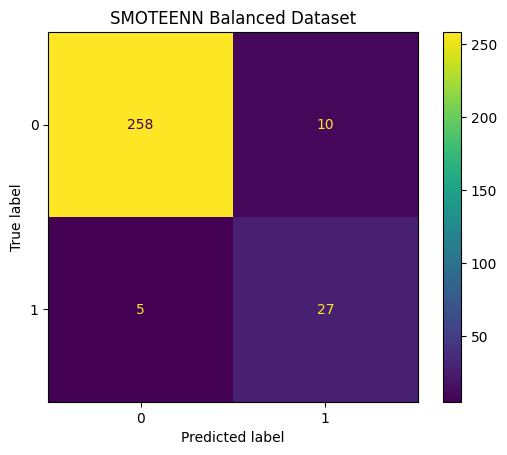

In [20]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    weights=[0.9, 0.1],
    random_state=42
)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title("Original Imbalanced Dataset")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print("After SMOTE Oversampling:")
print(f"Class Distribution: {np.bincount(y_smote)}")

undersampler = RandomUnderSampler(random_state=42)
x_under, y_under = undersampler.fit_resample(x_train, y_train)

print("After Undersampling:")
print(f"Class Distribution: {np.bincount(y_under)}")

smoteenn = SMOTEENN(random_state=42)
x_smoteenn, y_smoteenn = smoteenn.fit_resample(x_train, y_train)

print("After SMOTEENN Combination:")
print(f"Class Distribution: {np.bincount(y_smoteenn)}")

def train_and_evaluate(x_train, y_train, x_test, y_test, title):
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\n{title}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    plt.title(title)
    plt.show()

train_and_evaluate(x_train, y_train, x_test, y_test, "Original Imbalanced Dataset")
train_and_evaluate(x_smote, y_smote, x_test, y_test, "SMOTE Balanced Dataset")
train_and_evaluate(x_under, y_under, x_test, y_test, "Undersampled Dataset")
train_and_evaluate(x_smoteenn, y_smoteenn, x_test, y_test, "SMOTEENN Balanced Dataset")



# 15. Apply KNN classifier on appropriate data. Find best neighbourhood size, Indices of neighbourhood, distances of neighbourhood by taking a random new tuple.

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#load data
import pandas as pd
data = pd.read_csv("/content/P7_DLSR.csv")
data.head()

x = data.loc[:,"Time":"L4"]
y = data.loc[:, "ClASS"]

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(x_std[0],y_pred[0])

new_instance = pd.DataFrame([[-1.72884033 , 0.37297649 ,-2.52648902, -2.27357216 , 3.59901537]], columns=x.columns)
new_instance_std = scaler.transform(new_instance)
result = model.predict(new_instance_std)
print("Prediction For New Instance: ",result)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred, average='weighted'))
print()
#best neighbourhood size(k)
k_value = range(1, 21)
cv_scores = []

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k = k_value[np.argmax(cv_scores)]
print(f"Best k: {best_k}")
print(f'Best accuracy: {max(cv_scores)}')
print()
#Indices of neighborhood
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5)
knn.fit(x_std,y)

distances, indices = knn.kneighbors(new_instance_std)
print("Distances to Neighbors:", distances.flatten())
print("Indices of Neighbors:", indices.flatten())



[-1.72884033  0.37297649 -2.52648902 -2.27357216  3.59901537] Weak
Prediction For New Instance:  ['Weak']
Accuracy: 0.9814814814814815
Precision: 0.9818445896877269

Best k: 12
Best accuracy: 0.9907244052392408

Distances to Neighbors: [29.00395152 31.11580338 31.30525456 31.30715475 31.31126664]
Indices of Neighbors: [ 0  1 10 11  9]


# 16. Find support vectors and their probabilities by applying SVM on any binary classification dataset. Also find the best model to generate support vectors. Get the metrics for this trained model. Represent its graph also.

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


data1 = pd.read_csv('/content/Social_Network_Ads.csv')
print(data1.head())
X = data1[['Age', 'EstimatedSalary']].values
y = data1['Purchased'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svc = SVC(probability=True)
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

support_vectors = best_model.support_vectors_
support_vector_indices = best_model.support_
print("Support Vectors:\n", support_vectors)
print("Support Vector Indices:\n", support_vector_indices)


probabilities = best_model.predict_proba(X_test)
print("Probabilities for Test Instances:\n", probabilities)


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Best Model: SVC(C=1, probability=True)
Accuracy: 0.9333333333333333
Precision: 0.8823529411764706
Confusion Matrix:
 [[67  6]
 [ 2 45]]
Support Vectors:
 [[ 0.03295203  0.30121002]
 [-0.92217926  0.56549373]
 [ 0.79705706  0.77104772]
 [-1.78179743 -1.3138571 ]
 [ 0.98808332  2.09246627]
 [-0.54012675  1.38770971]
 [-1.87731056  0.47739916]
 [ 0.41500455  0.27184516]
 [ 0.41500455 -0.49164111]
 [ 0.31949142 -1.16703281]
 [-0.73115301  0.56549373]
 [ 0.31949142  0.06629116]
 [ 0.79705706  0.35993973]
 [ 0.22397829  0.15438573]
 [ 0.41500455  0.15438573]
 [-0.25358736 -1.40195167]
 [ 0.03295203  1.24088543]
 [ 0.31949142  0.06629116]
 [-0.25358736  0.53612887]
 [ 0.31949142  

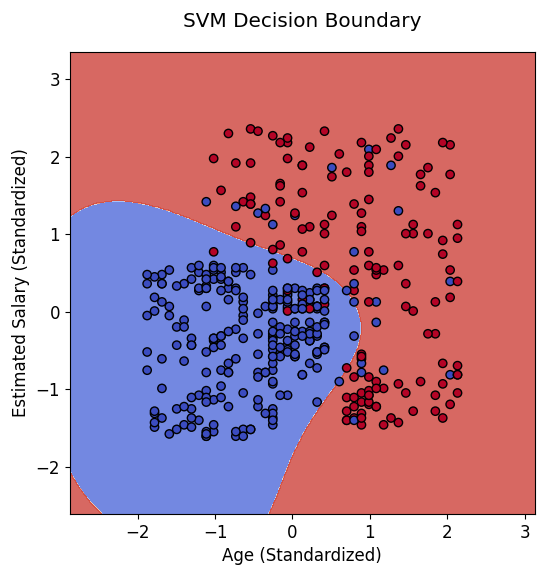

In [167]:
# Plotting decision boundary for binary classification
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Age (Standardized)")
    plt.ylabel("Estimated Salary (Standardized)")
    plt.show()


plot_decision_boundary(X, y, best_model)


# 17. Load a mixed type features data and apply appropriate model. Predict class for any new tuple and its probabilities.

In [175]:
import warnings
warnings.filterwarnings('ignore')


In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/Titanic.csv')
df = pd.DataFrame(data)

df['Age'] = df['Age'].fillna(df['Age'].mean())  # Fill missing values in 'Age' column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing values in 'Embarked' column
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 'male' -> 0, 'female' -> 1
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # 'S' -> 2, 'C' -> 0

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Embarked']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

new_en=pd.DataFrame([[1,'female',30,0,0,50,'S']],columns=X.columns)

new_en['Sex']=label_encoder.fit_transform(new_en['Sex'])
new_en['Embarked']=label_encoder.fit_transform(new_en['Embarked'])
print(new_en)
print("prediction:",model.predict(new_en))

accuracy: 0.996268656716418
Precision: 0.9962883992734738
Recall: 0.996268656716418
F1 Score: 0.9962302177349635
   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       1    0   30      0      0    50         0
prediction: [2]
